Text(0.5, 1.0, 'Original sine function with data points')

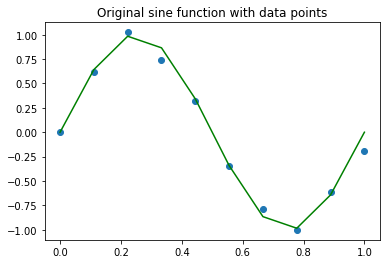

In [2]:
import numpy as np
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(1)
x_i=np.linspace(0,1,10)
y_i=np.sin(2*(np.pi)*x_i) + np.random.normal(scale=0.1,size=[x_i.shape[0]])

t=np.sin(2*(np.pi)*x_i)
a=np.ones(10)

phi=np.dstack((a,x_i))
plt.scatter(x_i,y_i)
plt.plot(x_i,t,color='green')
plt.title('Original sine function with data points')

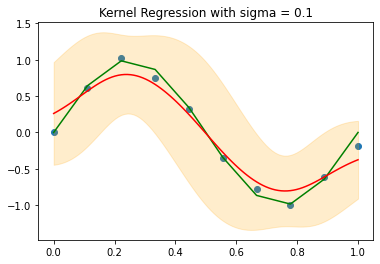

In [3]:
def Find_EV_value(x,X,t,sigma):
  pdf_vals = norm.pdf(x-X.reshape(10,1),loc=0,scale=sigma).T
  pdf_vals = pdf_vals/(pdf_vals.sum(axis=1,keepdims=True))
  Expectation=(pdf_vals*t.reshape(1,10)).sum(axis=1)
  Cond_var=np.sqrt(sigma **2 + (pdf_vals * t.reshape(1,10) **2).sum(axis=1) - Expectation **2)

  return Expectation, Cond_var
x_test=np.linspace(0,1,100)
sigma=0.1
E,V=Find_EV_value(x_test,x_i,y_i,sigma)
plt.scatter(x_i,y_i)
plt.plot(x_i,t,color='green')
plt.plot(x_test,E,color='red')
plt.fill_between(x_test,E-2*V,E+2*V,alpha=0.2,color='orange')
plt.title('Kernel Regression with sigma = 0.1')
plt.savefig('kernel_regression.jpg')